# Filtering

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import io

## Image

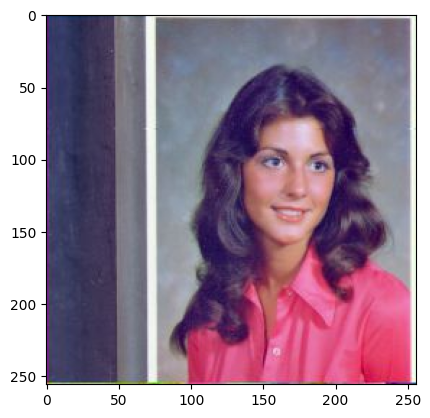

In [14]:
frame = io.imread('data/4.1.04.jpg')
frame = np.float32(frame) / 255

plt.imshow(frame)


[]

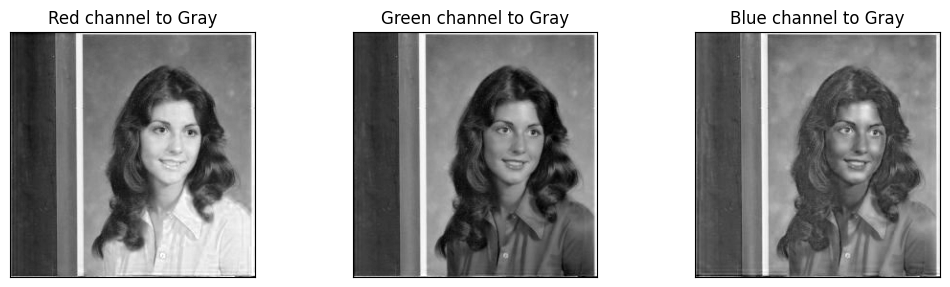

In [16]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Red Channel to gray
ax = fig.add_subplot(1, 3, 1)
ax.set_title('Red channel to Gray')
ax.imshow(frame[:,:,0], cmap="gray")
ax.set_xticks([])
ax.set_yticks([])

# Green Channel to Gray
ax = fig.add_subplot(1, 3, 2)
ax.set_title('Green channel to Gray')
ax.imshow(frame[:,:,1], cmap="gray")
ax.set_xticks([])
ax.set_yticks([])

# Blue Channel to Gray
ax = fig.add_subplot(1, 3, 3)
ax.set_title('Blue channel to Gray')
ax.imshow(frame[:,:,2], cmap="gray")
ax.set_xticks([])
ax.set_yticks([])

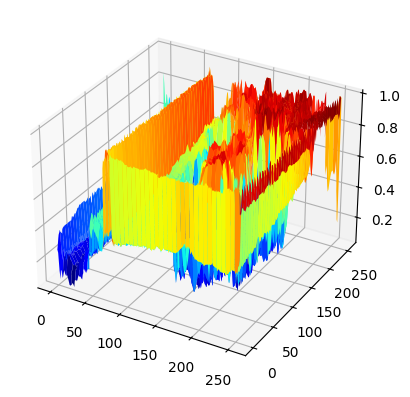

In [18]:
x = range(frame.shape[0])
y = range(frame.shape[1])

X, Y = np.meshgrid(y, x)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, frame[:,:,0], cmap='jet')

## Point Processing

[]

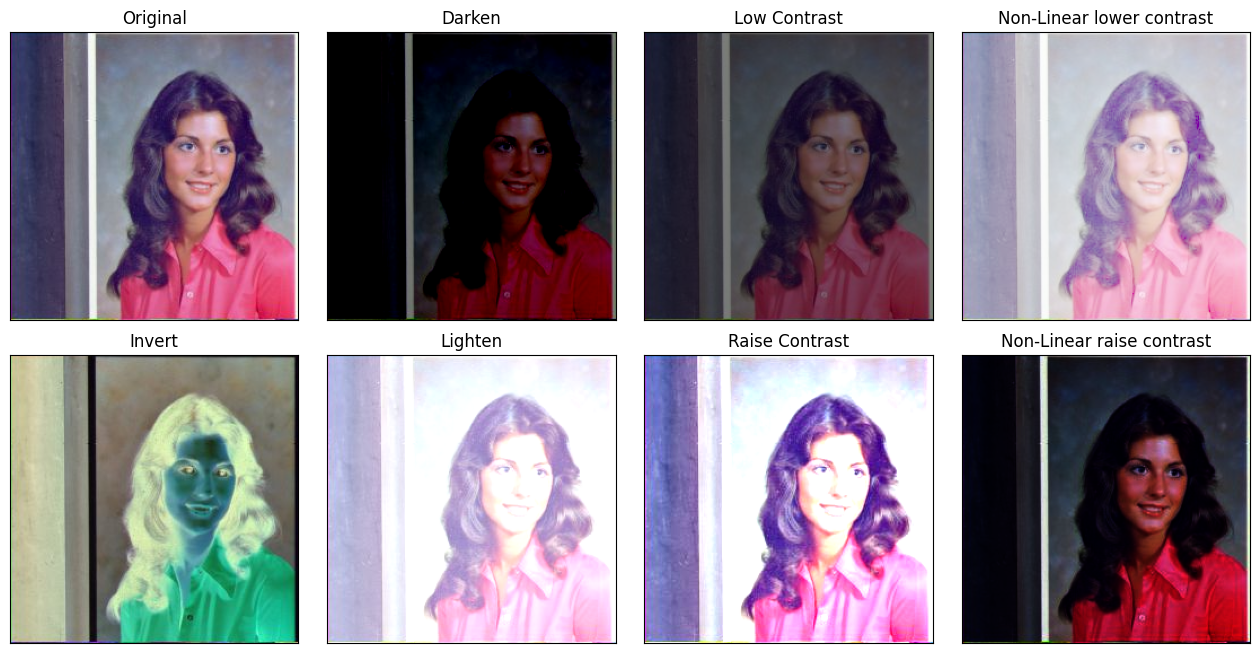

In [42]:
fig = plt.figure(figsize=(16, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

ax = fig.add_subplot(2, 4, 1)
ax.set_title('Original')
ax.imshow(frame)
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(2, 4, 2)
ax.set_title('Darken')
ax.imshow(np.clip(frame - 0.5, 0, 1))       # clip(a, a_max, a_min) -> in an array values < 0 will convert to 0 and > 1 to 1
                                            # frame - 0.5 -> subtract all values of frame by 0.5
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(2, 4, 3)
ax.set_title('Low Contrast')
ax.imshow(frame / 2)
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(2, 4, 4)
ax.set_title('Non-Linear lower contrast')
ax.imshow(frame**(1/3))
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(2, 4, 5)
ax.set_title('Invert')
ax.imshow(1 - frame)
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(2, 4, 6)
ax.set_title('Lighten')
ax.imshow(np.clip(frame+0.5, 0, 1))
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(2, 4, 7)
ax.set_title('Raise Contrast')
ax.imshow(np.clip(frame*2, 0, 1))
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(2, 4, 8)
ax.set_title('Non-Linear raise contrast')
ax.imshow(frame**3)
ax.set_xticks([])
ax.set_yticks([])

## Linear shift-invariant image filtering

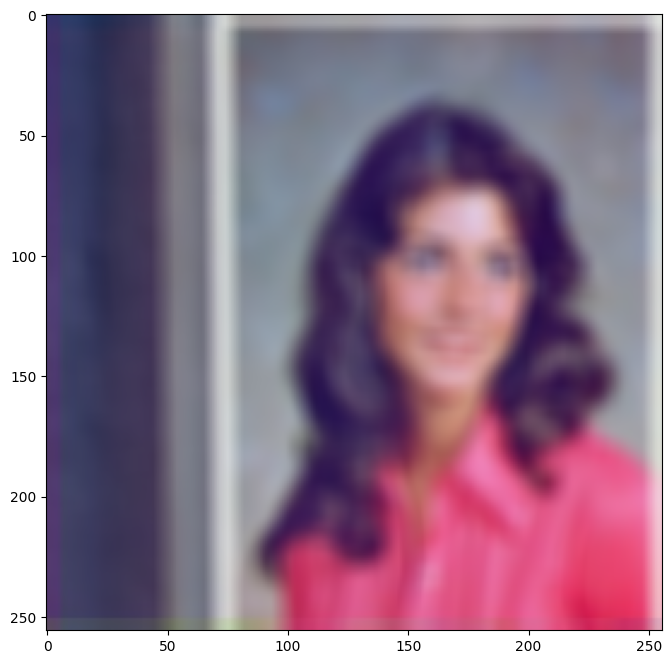

In [54]:
fig = plt.figure(figsize=(16, 8))

# Box Filter
N = 10                      # Smoothing kernel matrix of 10x10
g = np.ones((N,N)) / (N**2) # Kernel

image = cv2.filter2D(src=frame, ddepth=-1, kernel=g)
plt.imshow(image)

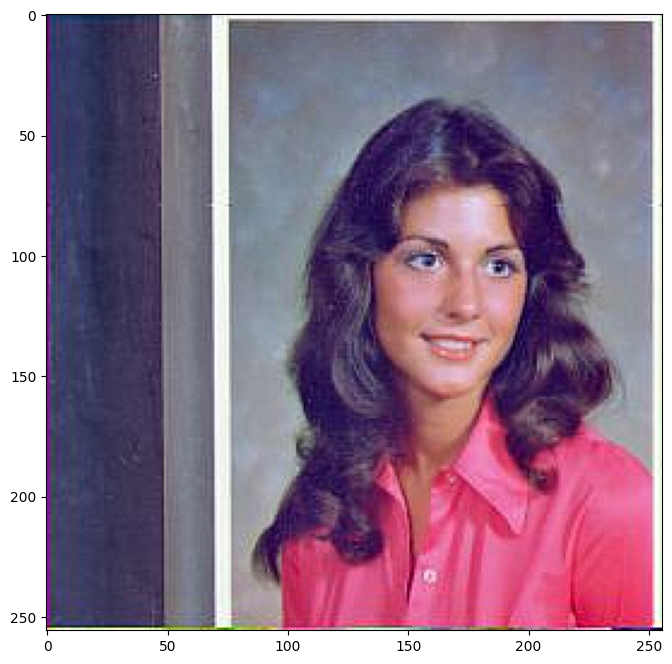

In [63]:
fig = plt.figure(figsize=(16, 8))


# Sharpening Filter
N = 3
g = -np.ones((N,N))/(N**2)
g[(N-1)//2,(N-1)//2] += 2

image = cv2.filter2D(frame, -1, g)
plt.imshow(np.clip(image,0,1), cmap='gray')

## Image Gradients

[]

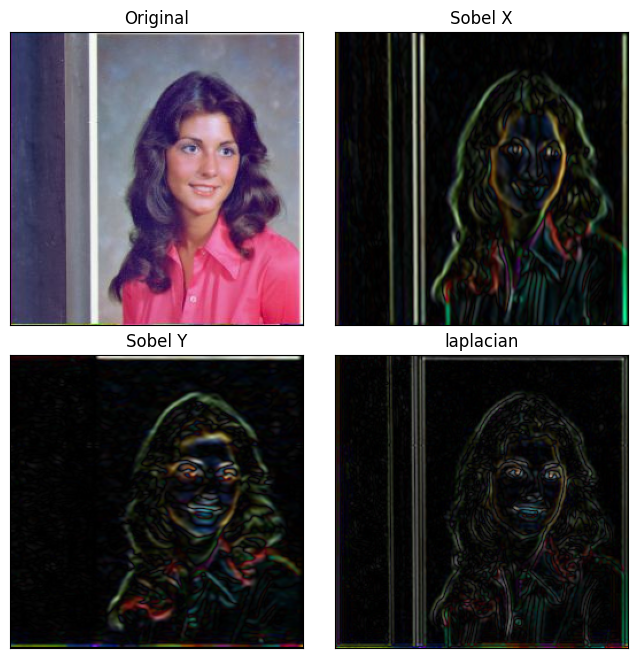

In [75]:
k = 7       # kernel size

laplacian = cv2.Laplacian(frame, -1, ksize=k)
sobel_x = cv2.Sobel(frame, -1, 1, 0, ksize=k)
sobel_y = cv2.Sobel(frame, -1, 0, 1, ksize=k)

fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

ax = fig.add_subplot(2, 2, 1)
ax.set_title('Original')
ax.imshow((frame), cmap='gray')
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(2, 2, 2)
ax.set_title('Sobel X')             # Vertical Edges
ax.imshow(np.abs(sobel_x)/np.abs(sobel_x).max(), cmap='gray')
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(2, 2, 3)
ax.set_title('Sobel Y')             # Horizontal Edges
ax.imshow(np.abs(sobel_y)/np.abs(sobel_y).max(), cmap='gray')
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(2, 2, 4)
ax.set_title('laplacian')           # Horizontal and Vertical images
ax.imshow(np.abs(laplacian)/np.abs(laplacian).max(), cmap='gray')
ax.set_xticks([])
ax.set_yticks([])